In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [16]:
#Importing the dataset

df=pd.read_csv("Walmart DataSet.csv")

In [17]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### EDA

In [18]:
#null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [19]:
#check duplicate values 

df.duplicated().sum()

0

In [20]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [21]:
#Check outliers 

columns=df.columns
columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

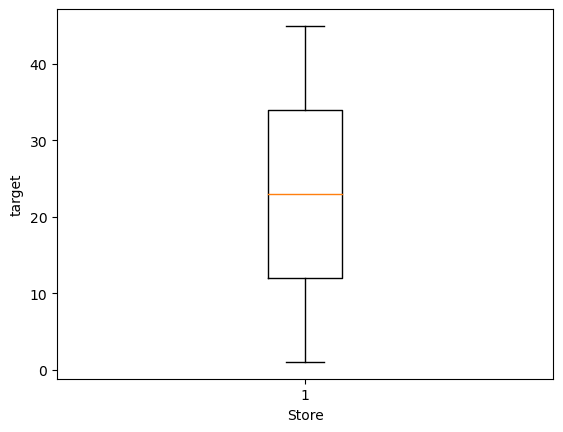

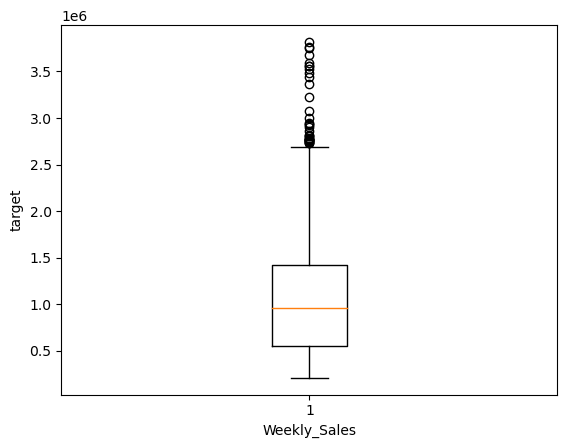

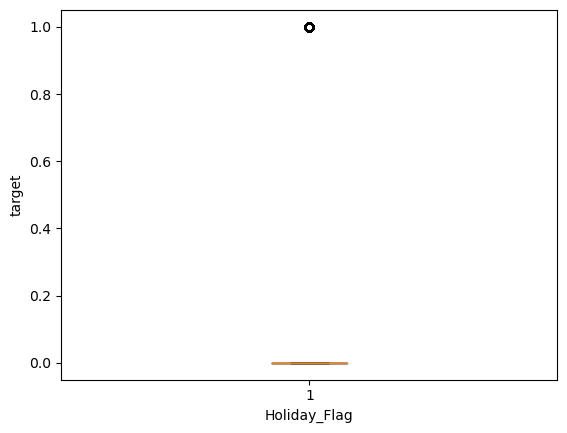

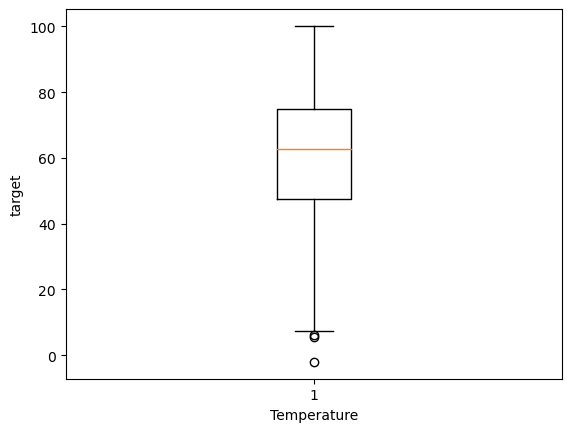

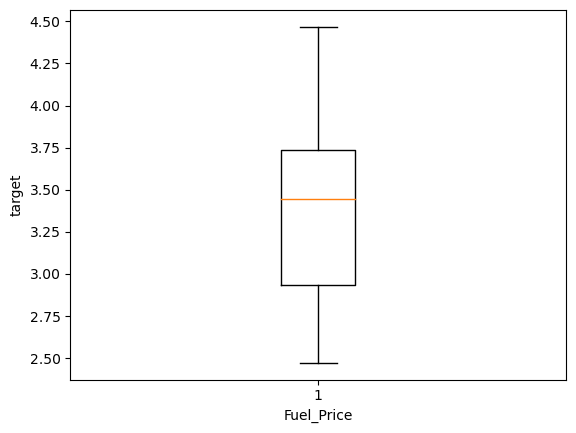

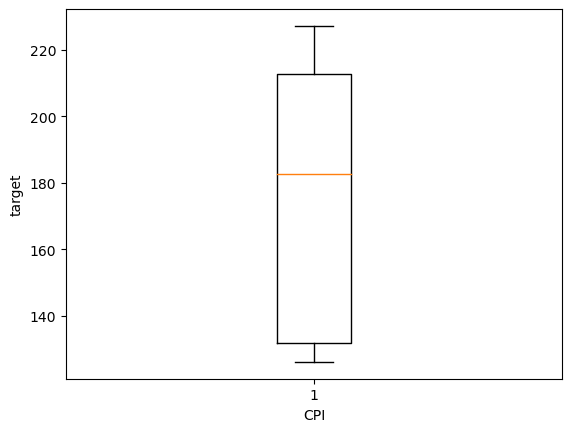

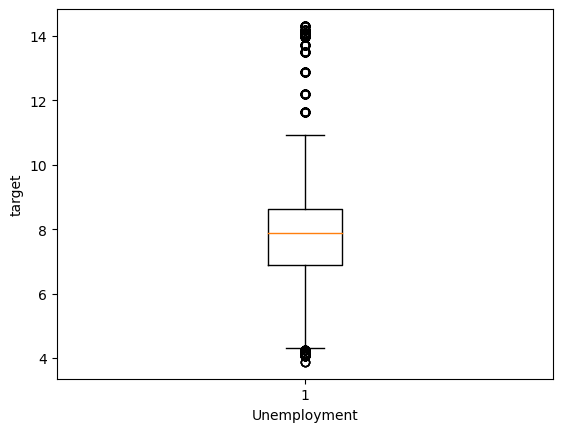

In [22]:
for i in columns:
    if (df[i].dtype!=object):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('target')
        plt.show()
        

In [35]:
#Removing outliers 

out_col=['Weekly_Sales','Unemployment']

for col in out_col:
    Q1 =df[col].quantile(0.25)
    Q3 =df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 *IQR #lower whisker
    UW = Q3 + 1.5 *IQR
    df = df[(df[col]>=LW) & (df[col]<=UW)]



In [23]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [24]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

# Calculate correlation coefficients for each store
correlation_by_store = df.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2, -1]

# Identify stores with the highest negative correlation
most_affected_stores = correlation_by_store.groupby('Store').min().idxmin()

print("Store suffering the most:")
print(most_affected_stores)


Store suffering the most:
38


C:\Users\hp\AppData\Local\Temp\ipykernel_11680\3529845592.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


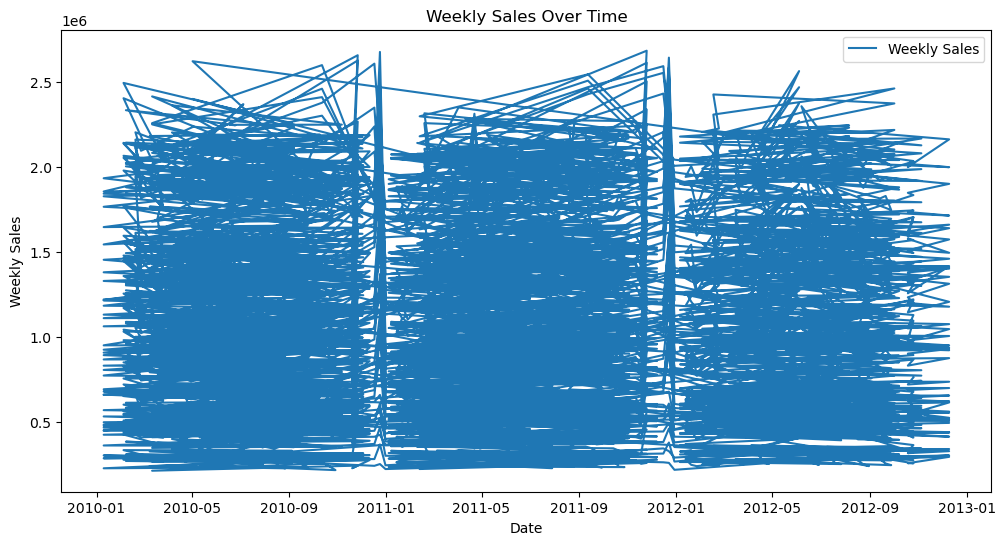

In [36]:
# b If the weekly sales show a seasonal trend, when and what could be the reason?

df['Date'] = pd.to_datetime(df['Date']) 

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()




In [27]:
# c Does temperature affect the weekly sales in any manner?

temperature = df['Weekly_Sales'].corr(df['Temperature'])
print(f"Correlation between Weekly Sales and Temperature: {temperature }")



Correlation between Weekly Sales and Temperature: -0.0638100131794696


In [28]:
# d How is the Consumer Price index affecting the weekly sales of various stores?
cpi_correlation = df['Weekly_Sales'].corr(df['CPI'])
print(f"Correlation between Weekly Sales and CPI: {cpi_correlation}")



Correlation between Weekly Sales and CPI: -0.07263416204017631


In [31]:
# Top performing stores according to the historical data
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head()
print("Top-performing stores:")
print(top_stores)


Top-performing stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [30]:
# f. Worst-performing store and difference analysis
worst_store = df.groupby('Store')['Weekly_Sales'].sum().idxmin()
difference_highest_lowest = df.groupby('Store')['Weekly_Sales'].sum().max() - df.groupby('Store')['Weekly_Sales'].sum().min()

print(f"Worst-performing store: {worst_store}")
print(f"Difference between highest and lowest performing stores: {difference_highest_lowest}")

Worst-performing store: 33
Difference between highest and lowest performing stores: 264237570.49999997


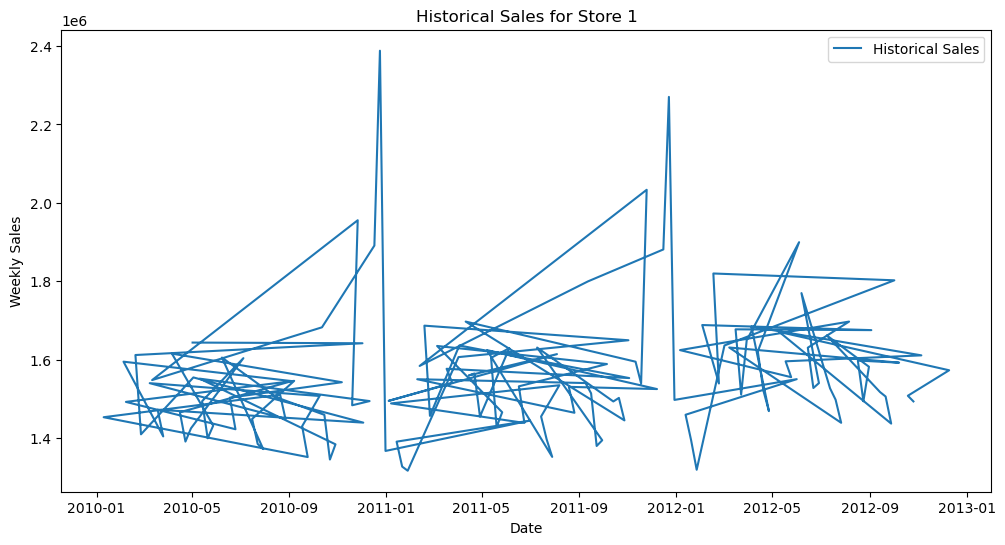

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-

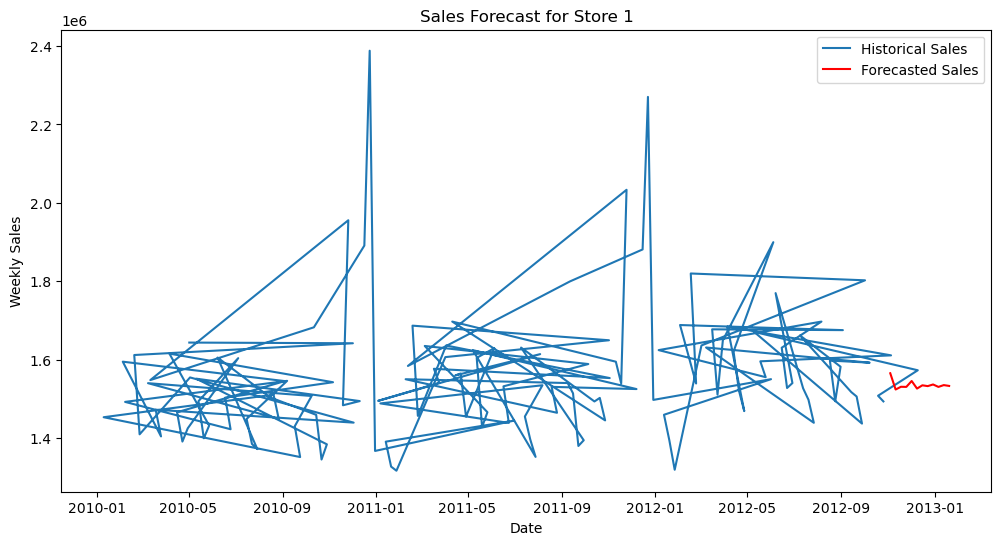

In [37]:
from statsmodels.tsa.arima.model import ARIMA

df['Date'] = pd.to_datetime(df['Date'])
store_id = 1
store_data = df[df['Store'] == store_id][['Date', 'Weekly_Sales']]

# Set 'Date' as the index
store_data.set_index('Date', inplace=True)

# Plot the historical sales data
plt.figure(figsize=(12, 6))
plt.plot(store_data.index, store_data['Weekly_Sales'], label='Historical Sales')
plt.title(f'Historical Sales for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

# Fit ARIMA model
model = ARIMA(store_data, order=(5, 1, 0))  # You may need to tune the order parameter
results = model.fit()

# Forecast the next 12 weeks
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(store_data.index, store_data['Weekly_Sales'], label='Historical Sales')
plt.plot(pd.date_range(store_data.index[-1], periods=forecast_steps + 1, freq='W')[1:], forecast.predicted_mean, label='Forecasted Sales', color='red')
plt.title(f'Sales Forecast for Store {store_id}')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()
